In [ ]:
import datetime
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# -- pandas optional setting for dataframe appearence
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
# --   (`auto layout` of matplotlib is turned on manually (https://stackoverflow.com/a/17390833))

%matplotlib inline

In [ ]:
!ls -l ../txt/ | grep tweets

## read pickle file

In [5]:
filename = [
    'dict_tweets_021942_all(kouhaku).pickle',
    'dict_tweets_021201.pickle',
    'dict_tweets_021726.pickle',
][0]
with open (os.path.join('..', 'txt', filename), 'rb') as f:
    dict_tweets = pickle.load(f)
'''
dict_tweets : dictionary of 'all tweets related to the performer' for all performers

dict_tweets[performer]
    tweet_time : pandas._libs.tslibs.timestamps.Timestamp (datetime64[ns, Asia/Tokyo])
    tweets_text : str
'''

# -- prepare list of performers (because dict is not ordered)
with open (os.path.join('..', 'txt', 'performers_with_query_utf16.txt'), 'r', encoding='utf-16') as f:
    trash_first_line = f.readline()
    l_performers = [line.split('\t', 1)[0] for line in f]

df_tweets = pd.DataFrame(columns=['order', 'performer', 'tweet_time', 'tweet_text'], index=None)
for i, performer in enumerate(l_performers):
    # -- add `order`, `performer ( = order and name)` column 
    dict_tweets[performer]['order'] = i+1
    dict_tweets[performer]['performer'] = '{:>2} '.format(i+1) + performer
    # -- round timestamp by minute
    dict_tweets[performer]['tweet_time'] = dict_tweets[performer]['tweet_time'].apply(lambda x: x.round(freq='min'))
    df_tweets = pd.concat([
        df_tweets,
        dict_tweets[performer]
    ], sort=False)
# -- define columns' dtype (concatenated df forgets those strangely)
df_tweets['order'] = df_tweets['order'].astype('int64')
df_tweets['tweet_time'] = pd.to_datetime(df_tweets['tweet_time'])
    
# -- debug
#     print(' -- performer : {} -- '.format(performer))
#     display(dict_tweets[performer].head(3))

display(df_tweets.info())
display(df_tweets.groupby(['order']).head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154135 entries, 0 to 8717
Data columns (total 4 columns):
order         154135 non-null int64
performer     154135 non-null object
tweet_time    154135 non-null datetime64[ns, Asia/Tokyo]
tweet_text    154135 non-null object
dtypes: datetime64[ns, Asia/Tokyo](1), int64(1), object(2)
memory usage: 5.9+ MB


None

,order,performer,tweet_time,tweet_text
0,1,1 三代目 J Soul Brothers,2018-12-31 23:42:00+09:00,紅白歌合戦トップバッター三代目JSB最高でしたありがとうm(_ _)m嬉しかったです!❣️🤓❣️✌🏼 https://t.co/FwHmzhCVGU
1,1,1 三代目 J Soul Brothers,2018-12-31 23:42:00+09:00,えりたんもいたし、三代目まだ紅白いるんや！じゃあCDTVはしばらくたってからだね？！
2,1,1 三代目 J Soul Brothers,2018-12-31 23:41:00+09:00,今年の紅白面白かった気がする😳
0,2,2 坂本冬美,2018-12-31 23:45:00+09:00,白勝った~♪ \n\n三代目、冬美さん、リトグリ、DAOKO、ジャンプ、あいみょん、セクゾ、キンプリ、関ジャニ、欅、セカオワ、乃木坂、TWICE、三浦大知、椎名&amp;宮本、星野源さん、米津さん、MISIA、嵐。\n\nあと、チコちゃん(笑)… https://t.co/QTli2PZxCe
1,2,2 坂本冬美,2018-12-31 23:45:00+09:00,紅白ってだいたい男が勝つよな、という私も坂本冬美Perfume石川さゆり最高だったにもかかわらず米津玄師が実在した衝撃につい白組に投票してしまった……
2,2,2 坂本冬美,2018-12-31 23:43:00+09:00,【年忘れ・ゲーム音楽紅白歌合戦：紅組（大トリ）】The Final Time Traveler／作曲・編曲：坂本英城 歌：サラ・オレイン（タイムトラベラーズ）試聴：https://t.co/UoRC0kAC5U（※）ライヴVer.… https://t.co/GLdscTQ56A
0,3,3 郷ひろみ,2018-12-31 23:44:00+09:00,今回のMVPは郷ひろみだな、いかにも紅白らしく一番盛り上がった。#紅白歌合戦
1,3,3 郷ひろみ,2018-12-31 23:43:00+09:00,今年の紅白に出演した岡村隆史のANNに出演した人達\n出川哲朗、DA（辺土名）、aiko、三浦大知、星野源、郷ひろみ、いきものがかり、福山雅治 #NHK紅白\n他いたっけ？
2,3,3 郷ひろみ,2018-12-31 23:43:00+09:00,今年の紅白何が一番好きって郷ひろみの流行護摩焚きでしょ ちゃんと燃えてるんだろうかで護摩焚き暗示してる
0,4,4 Little Glee Monster,2018-12-31 23:45:00+09:00,白勝った~♪ \n\n三代目、冬美さん、リトグリ、DAOKO、ジャンプ、あいみょん、セクゾ、キンプリ、関ジャニ、欅、セカオワ、乃木坂、TWICE、三浦大知、椎名&amp;宮本、星野源さん、米津さん、MISIA、嵐。\n\nあと、チコちゃん(笑)… https://t.co/QTli2PZxCe


In [46]:
# -- sampling
df_tweets[
    (df_tweets['performer']=='16 Aqours') &
    ('2018-12-31 21:10' < df_tweets['tweet_time']) &
    (df_tweets['tweet_time'] < '2018-12-31 21:20')].head(30)
# df_tweets[
#     (df_tweets['performer']=='45 米津玄師') &
#     ('2018-12-31 19:40' < df_tweets['tweet_time']) &
#     (df_tweets['tweet_time'] < '2018-12-31 19:50')].head()


,order,performer,tweet_time,tweet_text
1931,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白マジ最高だった！ #Aqours #ウラトーク
1932,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白 未来ずら～\n#NHK紅白 #Aqours
1933,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白、未来ずら〜 #Aqours
1934,16,16 Aqours,2018-12-31 21:19:00+09:00,初紅白出演のAqours アニメとの「シンクロ」ステージを披露 #ldnews https://t.co/sDfo7Yh9Os
1935,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白ウラトーク、ただでさえ盛り上がらないテーマのタイミングでゲストのAqoursがきてしまい、完全に曲スルーである
1936,16,16 Aqours,2018-12-31 21:19:00+09:00,ミクさんでて、刀剣男士でて、Aqoursでて、安室さんでて、米津玄師でて、まももでて？？紅白どうした？？？？今年視聴率めっちゃよやそう…。オタクに優しい紅白…
1937,16,16 Aqours,2018-12-31 21:19:00+09:00,Aqoursの皆さんお疲れ様です\n紅白最高！\n#紅白歌合戦
1938,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白 とうらぶと雅マモルと安室ｻﾝと進撃の巨人とAqoursって凄くね
1939,16,16 Aqours,2018-12-31 21:19:00+09:00,ラストカットが特別仕様だったり、ありしゃあいきゃんが各イメージカラーに因んで紅白色のポンポン持ってたり芸が細かい！\nお疲れ様Aqours … … ✨ ✨ ✨ \n\nと思ったら五木ひろしのバックで踊ってて吹いた
1940,16,16 Aqours,2018-12-31 21:19:00+09:00,紅白の副音声Aqoursだー！


## draw barplot

In [6]:
df_cnt = df_tweets.groupby(['order', 'performer'], as_index=False).count().rename(columns={'tweet_time': 'cnt_tweets'}).drop(columns=['tweet_text'])

display(df_cnt.info())
df_cnt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
order         50 non-null int64
performer     50 non-null object
cnt_tweets    50 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


None

,order,performer,cnt_tweets
0,1,1 三代目 J Soul Brothers,372
1,2,2 坂本冬美,482
2,3,3 郷ひろみ,802
3,4,4 Little Glee Monster,794
4,5,5 山内惠介,1120


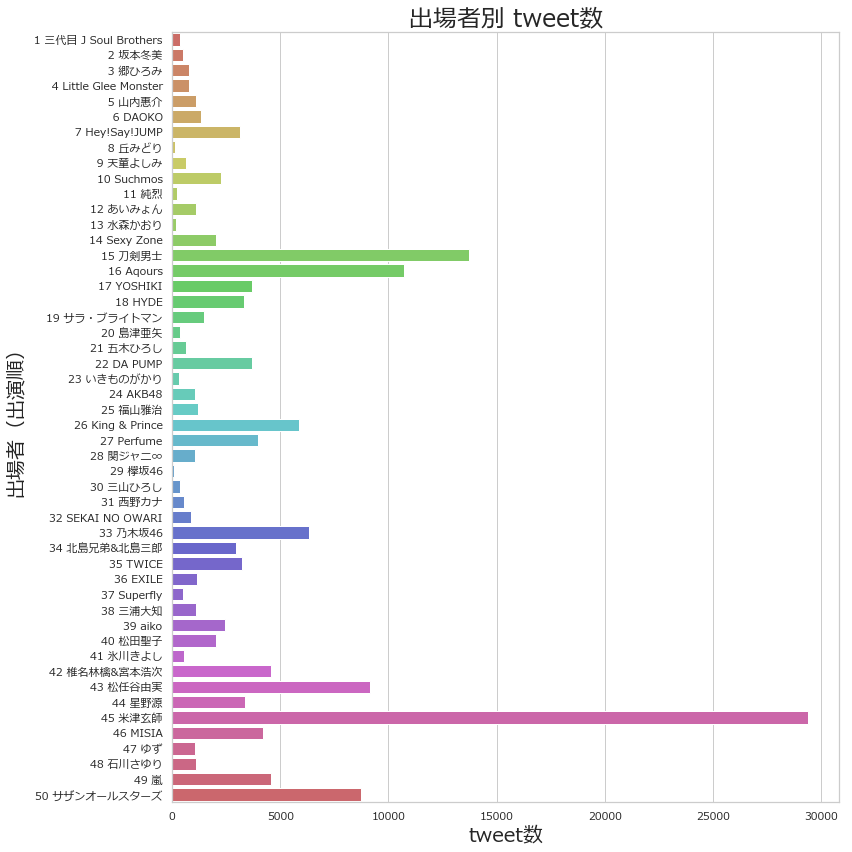

In [9]:
sns.set(style='whitegrid', font='Meiryo', rc = {'figure.figsize': (12, 12)}, )
ax = sns.barplot(x='cnt_tweets', y='performer', data=df_cnt, palette=sns.color_palette("hls", df_cnt['performer'].unique().size))
ax.set_title('出場者別 tweet数', fontsize=24)
ax.set_xlabel('tweet数', fontsize=20)
ax.set_ylabel('出場者（出演順）', fontsize=20)
ax.get_figure().savefig(os.path.join('..', 'figure', 'df_cnt.png'))

# --   notes: seabon cannot plot index of df

## draw lineplot
* notes
    - data_rangeで用意した時間軸(x軸)に各出演者の値をLEFT OUTER JOINしている
    - resample, asfreq: time seriesの始点と終点を指定できない
        - resampleは時刻を切り下げているようだ。一方でroundは最も近い時刻に寄せているようだ。

In [11]:
df_timeseries = df_tweets.groupby(['order', 'performer', pd.Grouper(key='tweet_time', freq='5min')]).count()\
    .rename(columns={'tweet_text': 'cnt_tweets'}).reset_index()
# df_timeseries = df_timeseris.groupby(['order', 'performer']).resample('5min', on='tweet_time').sum().reset_index()
# --   ここではcnt_tweets = 0のレコードが抹消されてしまっている。
# --   本当は (1) 完全なtweet_time×performerの組み合わせへouter joinする か (2) unstack/stackする ことで回復させるべき

display(df_timeseries.info())
df_timeseries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589 entries, 0 to 2588
Data columns (total 4 columns):
order         2589 non-null int64
performer     2589 non-null object
tweet_time    2589 non-null datetime64[ns, Asia/Tokyo]
cnt_tweets    2589 non-null int64
dtypes: datetime64[ns, Asia/Tokyo](1), int64(2), object(1)
memory usage: 81.0+ KB


None

,order,performer,tweet_time,cnt_tweets
0,1,1 三代目 J Soul Brothers,2018-12-31 19:15:00+09:00,15
1,1,1 三代目 J Soul Brothers,2018-12-31 19:20:00+09:00,59
2,1,1 三代目 J Soul Brothers,2018-12-31 19:25:00+09:00,47
3,1,1 三代目 J Soul Brothers,2018-12-31 19:30:00+09:00,30
4,1,1 三代目 J Soul Brothers,2018-12-31 19:35:00+09:00,19


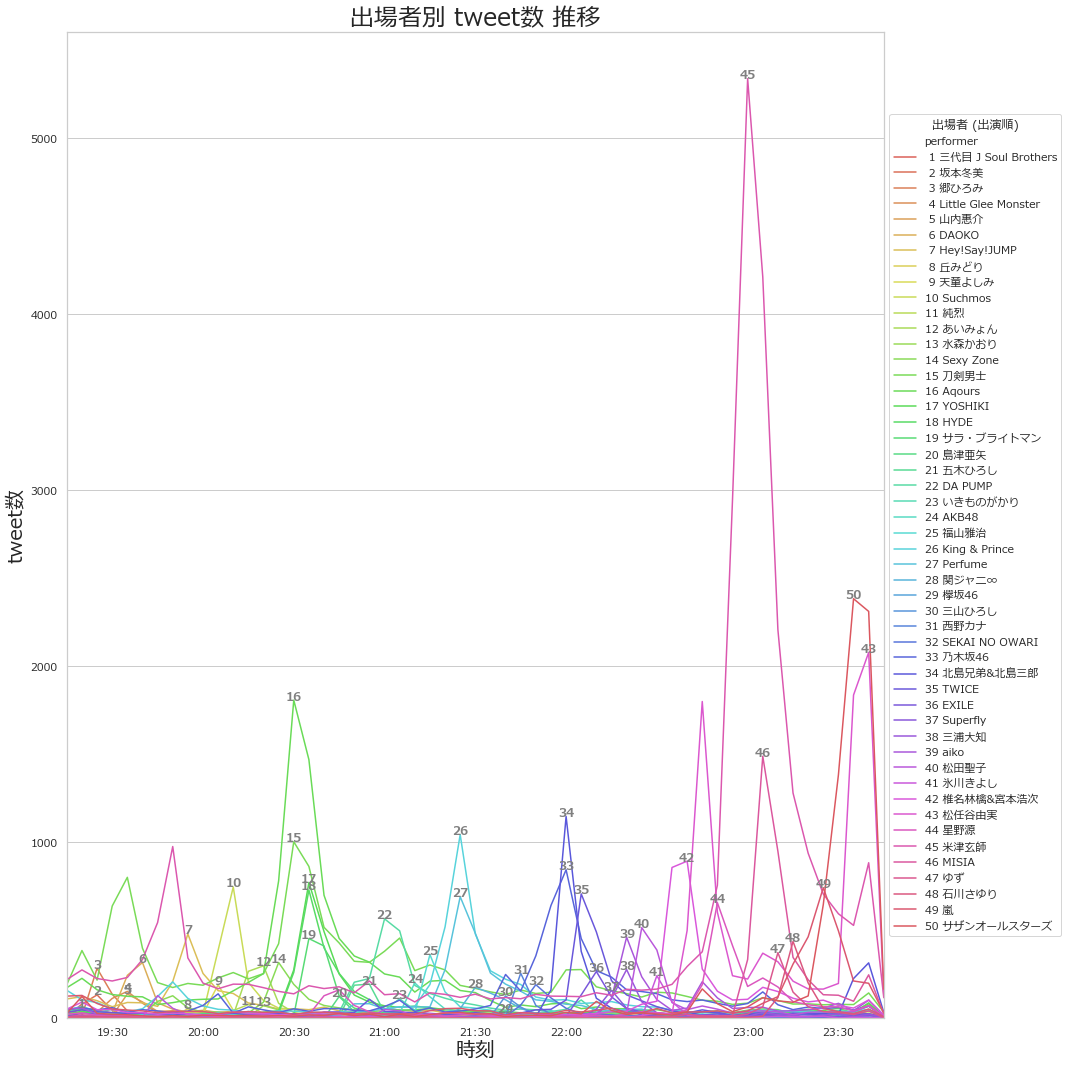

In [36]:
sns.set(style='whitegrid', font='Meiryo', rc = {'figure.figsize': (15, 15)}, )
ax = sns.lineplot(x='tweet_time', y='cnt_tweets', hue='performer', data=df_timeseries,
                  palette=sns.color_palette("hls", df_timeseries['performer'].unique().size))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=df_timeseries['tweet_time'][0].tzinfo))
ax.xaxis_date(tz='Asia/Tokyo')  # treat x-axis timestamp as if you are in tz='Asia/Tokyo'
ax.set_xlim(left=df_timeseries['tweet_time'].min(), right=df_timeseries['tweet_time'].max())
ax.set_ylim(bottom=0)
ax.set_title('出場者別 tweet数 推移', fontsize=24)
ax.set_xlabel('時刻', fontsize=20)
ax.set_ylabel('tweet数', fontsize=20)
ax.grid(False, axis='x')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)).set_title('出場者 (出演順)', prop={'size':12})

# -- add text to plot
for order in df_timeseries['order'].unique():
    y = df_timeseries[df_timeseries['order']==order]['cnt_tweets'].max()
    x = mdates.date2num(df_timeseries[(df_timeseries['order']==order) & (df_timeseries['cnt_tweets']==y)]['tweet_time'][0])
    # --   notes: you cannot use `and` or `& without ()` here due to pandas
    # --   notes: you have to convert pandas's datetime64 to matplotlib's date for add text
#     ax.annotate(s=i+1, xy=(x, y))
    ax.text(x=x, y=y, s=order, horizontalalignment='center', color='gray', weight='bold')
    
ax.get_figure().savefig(os.path.join('..', 'figure', 'df_timeseries.png'))


## old

In [ ]:
df_timeseries = pd.DataFrame(columns=['tweet_time', 'performer', 'cnt_tweets'], index=None)
display(df_timeseries.head())

left = pd.DataFrame({'tweet_time': pd.date_range(start='2018-12-31 19:15:00', end='2018-12-31 23:44:59', freq='5min', tz='Asia/Tokyo')})
for i, performer in enumerate(l_performers):
    # -- count tweets by minute
    right = dict_tweets[performer].groupby(['tweet_time'], as_index=False).count().rename(columns={'tweet_text': 'cnt_tweets'})
    # -- re-count tweets by 5 minutes
    right = right.resample('5min', on='tweet_time').sum().reset_index()
    joined = left.merge(right=right, how='left', on='tweet_time', suffixes=['', '']).fillna(0)  # (?) if use inplace=True in fillna(), nothing returned
    joined['performer'] = '{:>2} '.format(i+1) + performer
    df_timeseries = pd.concat([
        df_timeseries,
        joined
    ], join='inner', sort=False)
df_timeseries['cnt_tweets'] = df_timeseries['cnt_tweets'].astype('int')
    
# -- timestamp -> strに変換する場合は下記
#df_timeseries['tweet_time'] = df_timeseries['tweet_time'].dt.strftime('%H%M')

display(joined.head())
display(df_timeseries.head())
display(df_timeseries.dtypes)

## old2

In [ ]:
df_timeseries = pd.DataFrame({'tweet_time': pd.date_range(start='2018-12-31 19:15:00', end='2018-12-31 23:44:59', freq='5min', tz='Asia/Tokyo')})

for performer in dict_tweets.keys():
    # -- count tweets by minute
    right = dict_tweets[performer].groupby(['tweet_time'], as_index=False).count().rename(columns={'tweet_text': performer})
    # -- re-count tweets by 5 minutes
    right = right.resample('5min', on='tweet_time').sum().reset_index()
    df_timeseries = df_timeseries.merge(right=right, how='left', on='tweet_time', suffixes=['', ''])
df_timeseries.fillna(0, inplace=True)

df_timeseries.head()

In [ ]:
sns.set(style='whitegrid', font='Meiryo', rc = {'figure.figsize': (10, 15)}, )
ax = sns.lineplot(x='tweet_time', y='坂本冬美', data=df_timeseries, legend='brief')
ax.set_xlabel('test')

## playground

In [ ]:
## list up available font
import matplotlib.font_manager
l = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

l

In [ ]:
d = {}
d = {'test':1}
d['test2'] = 2
d

## sample

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
ax = sns.lineplot(x="time", y="firing_rate",hue="coherence", style="choice",data=dots)

In [ ]:
dots